# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0)

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.4999999895543077


# Portfolio optimization

In [14]:
### SOLVE HERE
import solver_create_front
import data_loading
import utils

WS_FRONT_EXPORT = "ws_front1.txt"
EC_FRONT_EXPORT = "ec_front1.txt"

In [15]:
companies = data_loading.load_all_companies_from_dir("./data/Bundle1")

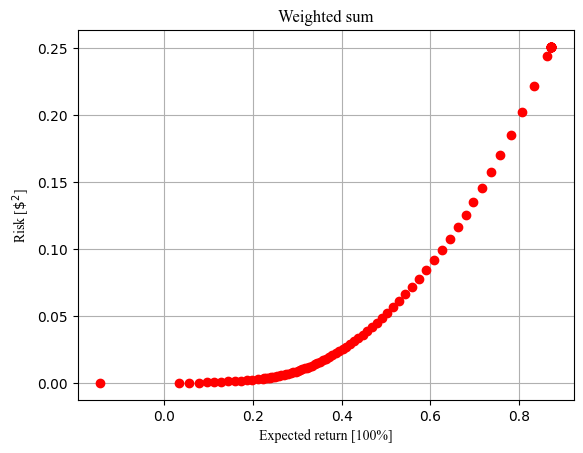

In [16]:
weighted_sum_solutions = solver_create_front.uniformly_search_weight_space(companies, 100, 200)
solver_create_front.plot_front(companies, weighted_sum_solutions, title="Weighted sum")

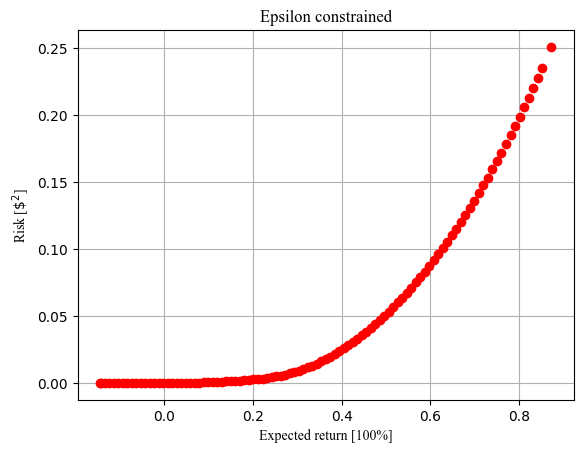

In [17]:
epsilon_solutions = solver_create_front.uniformly_search_threshold_space(companies, 100, 200)
solver_create_front.plot_front(companies, epsilon_solutions, title="Epsilon constrained")

In [18]:
print(f"\tExpected return\t  Risk\t\tRatio\t\tNum companies")
for i, solution in enumerate(epsilon_solutions):
    expected_return = utils.portfolio_expected_return(companies, solution[1]['x'])
    risk = utils.portfolio_risk(companies, solution[1]['x'])
    print(f"{i:2}. {np.round(expected_return, 3):16}\t{np.round(risk, 3):8}\t{np.round(expected_return/risk, 3):8}\t{np.count_nonzero(np.array(solution[1]['x']) > 1e-5)}")

	Expected return	  Risk		Ratio		Num companies
 0.           -0.144	     0.0	-474.672	14
 1.           -0.142	     0.0	 -468.95	15
 2.           -0.134	     0.0	-440.892	14
 3.           -0.124	     0.0	-406.798	14
 4.           -0.114	     0.0	-372.343	15
 5.           -0.103	     0.0	-337.698	15
 6.           -0.093	     0.0	-302.984	15
 7.           -0.083	     0.0	-268.325	15
 8.           -0.073	     0.0	 -233.84	15
 9.           -0.063	     0.0	 -199.64	15
10.           -0.053	     0.0	-165.825	15
11.           -0.042	     0.0	-132.485	15
12.           -0.032	     0.0	 -99.705	15
13.           -0.022	     0.0	 -67.561	15
14.           -0.012	     0.0	 -36.122	15
15.           -0.002	     0.0	  -5.444	16
16.            0.008	     0.0	  24.403	15
17.            0.018	     0.0	   53.28	14
18.            0.029	     0.0	  79.195	14
19.            0.039	     0.0	 100.087	14
20.            0.049	     0.0	 115.147	13
21.            0.059	     0.0	 124.597	13
22.            0.069	   0.001	

Among these, I decided to chose solution 37 for the portfolio game

In [19]:
chosen_min_ret, chosen_solution = epsilon_solutions[37]
ordered_weights = utils.weights_in_valid_order(companies, chosen_solution['x'])
# print("Min expected return:", chosen_min_ret)
for company_name, weight in zip(utils.COMPANY_ORDER, ordered_weights):
    print(f"{company_name:19}", np.round(weight, 2))

SuperFuture         0.0
Apples              0.0
WorldNow            0.0
Electronics123      0.0
Photons             0.0
SpaceNow            0.0
PearPear            0.37
PositiveCorrelation 0.06
BetterTechnology    0.0
ABCDE               0.0
EnviroLike          0.0
Moneymakers         0.0
Fuel4               0.0
MarsProject         0.37
CPU-XYZ             0.0
RoboticsX           0.18
Lasers              0.02
WaterForce          0.0
SafeAndCare         0.0
BetterTomorrow      0.0


In [20]:
chosen_exp_ret = utils.portfolio_expected_return(companies, chosen_solution['x'])
chosen_risk = utils.portfolio_risk(companies, chosen_solution['x'])
print(chosen_exp_ret)
print(chosen_risk)

0.2216070872649438
0.0035668990585772885


Data for submission:

In [21]:
print(chosen_exp_ret, end=" ")
print(chosen_risk, end = " ")
for weight in ordered_weights:
    print(weight,  end=", ")

0.2216070872649438 0.0035668990585772885 1.0251652094173745e-08, 3.2298170638724315e-08, 6.505618178746683e-07, 1.8413226578557183e-08, 4.23305172698446e-08, 6.306775209173726e-08, 0.3668022084828672, 0.061618815871245035, 1.3824240077869665e-08, 8.644665649845455e-07, 1.8843236108265335e-09, 2.987919062764484e-08, 0.0004081023422847454, 0.3660731075758385, 1.8732855958022932e-06, 0.18066607274170104, 0.024427478059861403, 5.559817292282156e-07, 3.706977748432357e-08, 2.1611643635980332e-08, 

In [22]:
utils.export_front_to_file(companies, [s[1] for s in weighted_sum_solutions], WS_FRONT_EXPORT)
utils.export_front_to_file(companies, [s[1] for s in epsilon_solutions], EC_FRONT_EXPORT)